

# **Planejamento de rotas para coleta de amostras médicas**
## SCC0230 - Inteligência Artificial
## Integrantes:

Eduardo Garcia   - 11795676

Henrico Lazuroz  - 12543502

Matheus Vellosa  - 12421725

Victor Fernandes - 12675399


## Bibliotecas utilizadas

In [ ]:
import time
import heapq
from collections import deque
import matplotlib.pyplot as plt

## Proposta do problema

Considere um cenário em que um médico, ou um profissional de coleta, precise visitar diferentes localidades em uma cidade, para coletar amostras para análises clínicas. Essas localidades podem ser casas de pacientes, hospitais, clínicas ou outros locais de coleta. Para otimizar seu tempo e recursos, é essencial que o médico escolha a rota mais curta e eficiente.

Visualizemos esse problema por meio de uma representação gráfica, em que cada localidade seja representada por um nó, e que as estradas ou caminhos entre essas localidades sejam as arestas. Agora, cada aresta tem um peso associado, que pode representar a distância ou o tempo esperado para viajar entre dois nós. Este modelo é efetivamente um grafo ponderado.

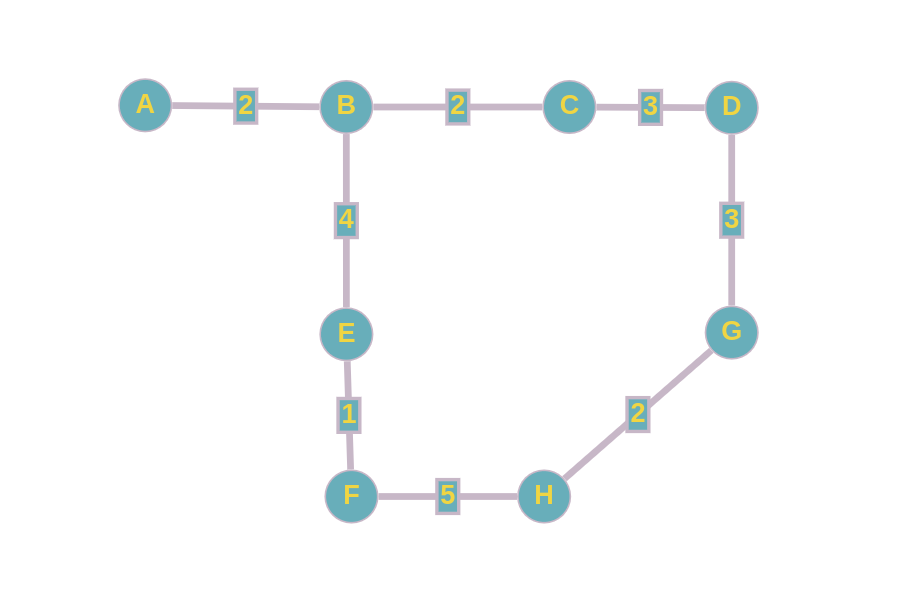

Considerando o grafo ponderado acima, onde as localidades são representadas pelas letras de 'A' a 'H' e os caminhos entre essas localidades têm pesos associados; criamos uma heurística associada a cada nó, que pode nos ajudar a encontrar o caminho mais curto utilizando algoritmos informados, por meio de estimativas das distâncias.

Além disso, imagine que o médico precise visitar, especificamente, os pontos 'E' e 'H' como parte de seus deveres diários. Estes são os pontos obrigatórios. O desafio é encontrar a rota mais curta que comece do ponto inicial 'A', passe por todos os pontos obrigatórios e, finalmente, alcance o destino 'H'.

Com isso, temos a representação do problema a seguir:

In [ ]:
# Definindo o grafo como um dicionário de dicionários, onde as chaves são as cidades
# e os valores são dicionários contendo as cidades vizinhas e os custos das arestas.
grafo = {
    'A': {'B': 2},
    'B': {'A': 2, 'C': 2, 'E': 4},
    'C': {'B': 2, 'D': 3},
    'D': {'C': 3, 'E': 2, 'G': 3},
    'E': {'B': 4, 'D': 2, 'F': 1},
    'F': {'A': 3, 'E': 1, 'H': 5},
    'G': {'D': 3, 'H': 2},
    'H': {'F': 5, 'G': 2}
}

# Heuristica de cada cidade
h = {
    'A': 6,
    'B': 5,
    'C': 4,
    'D': 3,
    'E': 2,
    'F': 5,
    'G': 1,
    'H': 0
}

# Cidades de origem e destino, e cidade obrigatória
inicio = 'A'
objetivo = 'H'
obrigatorio = ['E', 'H']

Para solucionar este problema, podemos considerar algoritmos de busca como **BFS**, **DFS** e **A***.

## 1. Algoritmo BFS

O algoritmo BFS padrão explora a estrutura de um grafo em "camadas", ou seja, ele primeiro explora todos os vizinhos de um nó e depois todos os vizinhos desses vizinhos, e assim por diante. Quando adaptamos o BFS para grafos ponderados, consideramos os pesos (ou distâncias) entre os nós para determinar a ordem de exploração.

Matematicamente, se representarmos o grafo como uma função $G(V,E)$ onde $V$ é o conjunto de vértices e $E$ é o conjunto de arestas, o BFS ponderado explora os vizinhos de um vértice $v$ baseado nos pesos das arestas $w(e)$ conectando $v$ aos seus vizinhos.

$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \forall e \in E, w(e): E \rightarrow \mathbb{R^+} \\ $

Onde $w(e)$ é uma função que associa a cada aresta $e$ um peso real positivo.

Dessa forma, implementamos o algoritmo a seguir, considerando cálculos para coleta de dados como o número de iterações e o tempo de execução, para resolução do problema proposto:

In [ ]:
def bfs_ponderado(grafo, inicio, objetivo, obrigatorio):
    """Busca em largura ponderada (BFS) com pontos obrigatórios."""

    iterações = 0  # Contador para iterações

    def bfs_parcial(grafo, inicio, fim, iterações):
        """ Função interna para realizar BFS entre dois nós."""

        # Inicializa distâncias com infinito e a distância do início como 0
        distancia = {cidade: float('inf') for cidade in grafo}
        distancia[inicio] = 0

        # Utiliza deque para uma fila eficiente
        fila = deque([inicio])

        # Para rastrear a trajetória de cada nó e reconstruir o caminho no final
        caminho_percorrido = {cidade: None for cidade in grafo}

        # Processa a fila até estar vazia
        while fila:
            no_atual = fila.popleft()
            iterações += 1
            # Atualiza distâncias com base nos pesos das arestas
            for vizinho, peso in grafo[no_atual].items():
                nova_distancia = distancia[no_atual] + peso
                if nova_distancia < distancia[vizinho]:
                    distancia[vizinho] = nova_distancia
                    caminho_percorrido[vizinho] = no_atual
                    fila.append(vizinho)

        # Reconstrói o caminho a partir do nó final
        caminho = []
        temp = fim
        while temp:
            caminho.append(temp)
            temp = caminho_percorrido[temp]
        caminho.reverse()
        return caminho, iterações

    total_caminho = []
    # Combina o nó de início, nós obrigatórios e nó objetivo em uma lista
    pontos = [inicio] + obrigatorio + [objetivo]

    # Encontra caminhos entre pares consecutivos de pontos
    for i in range(len(pontos) - 1):
        segmento, iterações_temp = bfs_parcial(grafo, pontos[i], pontos[i+1], iterações)
        iterações += iterações_temp
        if not segmento:  # Se não há caminho entre um par, retorna None
            return None, iterações
        total_caminho.extend(segmento[:-1])  # Combina segmentos para formar caminho total
    total_caminho.append(objetivo)

    return total_caminho, iterações

Utilizando o algoritmo BFS para encontrarmos o melhor caminho:

In [ ]:
start_time = time.time()
caminho_bfs, iteracoes = bfs_ponderado(grafo, inicio, objetivo, obrigatorio)
end_time = time.time()
elapsed_time = end_time - start_time
if caminho_bfs:
    print("Melhor caminho via BFS:", caminho_bfs)
    print("Número de iterações: ", iteracoes)
    print("Tempo de execução: {}s".format(round(elapsed_time, 5)))
else:
    print("Caminho não encontrado via BFS.")

Melhor caminho via BFS: ['A', 'B', 'E', 'F', 'H']
Número de iterações:  60
Tempo de execução: 0.00022s


## 2. Algoritmo DFS

A DFS explora o grafo "profundamente", movendo-se o mais longe possível ao longo de um ramo antes de retroceder. Para obter o caminho ótimo, a DFS ponderada precisa considerar todos os caminhos possíveis entre os nós de início e fim e, em seguida, selecionar o caminho com o menor custo total.

Se definirmos o custo de um caminho $p$ como a soma dos pesos das arestas que compõem $p$:

$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \text{custo}(p) = \sum_{e \in p} w(e) \\ $

A DFS ponderada tentará minimizar o
custo $\text{custo}(p)$ entre todos os caminhos possíveis $p$.

Dessa forma, implementamos o algoritmo a seguir, considerando cálculos para coleta de dados como o número de iterações e o tempo de execução, para resolução do problema proposto:

In [ ]:
def dfs_ponderado(grafo, inicio, objetivo, obrigatorio):
    """Busca em profundidade ponderada (DFS) que retorna o caminho ótimo, usando pontos obrigatórios."""

    iterações = 0  # Contador para iterações

    # Função interna para encontrar todos os caminhos entre o início e o fim
    def dfs_todos_caminhos(grafo, atual, fim, caminho):
        nonlocal iterações
        iterações += 1

        caminho = caminho + [atual]
        if atual == fim:
            return [caminho]
        caminhos = []
        for vizinho in grafo[atual]:
            if vizinho not in caminho:
                novos_caminhos = dfs_todos_caminhos(grafo, vizinho, fim, caminho)
                for novo_caminho in novos_caminhos:
                    caminhos.append(novo_caminho)
        return caminhos

    total_caminho = []
    pontos = [inicio] + obrigatorio + [objetivo]
    for i in range(len(pontos) - 1):
        # Busca todos os caminhos entre dois pontos consecutivos
        caminhos = dfs_todos_caminhos(grafo, pontos[i], pontos[i+1], [])
        if not caminhos:
            return None, iterações

        # Encontra o caminho mais curto entre os caminhos encontrados
        min_caminho = min(caminhos, key=lambda caminho: sum(grafo[caminho[i]][caminho[i+1]] for i in range(len(caminho)-1)))
        total_caminho.extend(min_caminho[:-1])
    total_caminho.append(objetivo)

    return total_caminho, iterações


Utilizando o algoritmo DFS para encontrarmos o melhor caminho:

In [ ]:
start_time = time.time()
caminho_dfs, iteracoes = dfs_ponderado(grafo, inicio, objetivo, obrigatorio)
end_time = time.time()
elapsed_time = end_time - start_time
if caminho_bfs:
    print("Melhor caminho via DFS:", caminho_dfs)
    print("Número de iterações: ", iteracoes)
    print("Tempo de execução: {}s".format(round(elapsed_time, 5)))
else:
    print("Caminho não encontrado via DFS.")

Melhor caminho via DFS: ['A', 'B', 'E', 'F', 'H']
Número de iterações:  32
Tempo de execução: 0.00024s


## 3. Algoritmo A*

O algoritmo A* é uma extensão do algoritmo de Dijkstra para incluir uma heurística, que ajuda na busca do caminho mais curto. A* combina o custo real $g(n)$ para alcançar um nó $n$, e uma estimativa do custo $h(n)$ para alcançar o objetivo a partir desse nó.

O valor $f(n)$ de um nó $n$ é dado por:

$\qquad \qquad \qquad \qquad \qquad \qquad \qquad f(n)=g(n)+h(n) \\ $

Onde:

* $g(n)$ é o custo real para alcançar o nó $n$ a partir do nó inicial.

* $h(n)$ é a estimativa do custo para alcançar o objetivo a partir do nó $n$.

A* seleciona o nó com o menor valor de $f(n)$ para exploração. Esse método permite que o A* seja direcionado e eficiente em sua busca, ao contrário de uma busca cega como o BFS ou DFS.

Em nosso contexto, a função heurística $h(n)$ é dada para cada nó, e ela fornece uma estimativa da distância de $n$ ao objetivo. Além disso, para obtermos o caminho ótimo que passa por todos os nós obrigatórios, executamos uma busca A* entre o nó inicial e os nós obrigatórios, de dois em dois, para obtermos o caminho desejado a partir de mútiplas buscas parciais.

Dessa forma, implementamos o algoritmo a seguir, considerando cálculos para coleta de dados como o número de iterações e o tempo de execução, para resolução do problema proposto:

In [ ]:
def busca_a_estrela(grafo, inicio, objetivo, obrigatorio):
    """Busca A* com pontos obrigatórios."""

    iterações = 0  # Contador para iterações

    def a_estrela_parcial(grafo, inicio, fim, iterações):
        """Função interna para realizar A* entre dois nós."""

        abertos = []
        heapq.heappush(abertos, (0 + h[inicio], 0, inicio, [inicio]))
        fechados = set()

        while abertos:
            iterações += 1
            custo_estimado, custo, no_atual, caminho = heapq.heappop(abertos)

            # Se o nó atual corresponde ao fim do segmento
            if no_atual == fim:
                return caminho, iterações
            if no_atual in fechados:
                continue
            fechados.add(no_atual)

            # Atualiza a lista de nós abertos com base nos pesos e heurística
            for vizinho, custo_vizinho in grafo[no_atual].items():
                if vizinho not in fechados:
                    novo_caminho = list(caminho)
                    novo_caminho.append(vizinho)
                    novo_custo = custo + custo_vizinho
                    custo_estimado = novo_custo + h[vizinho]
                    heapq.heappush(abertos, (custo_estimado, novo_custo, vizinho, novo_caminho))

        return None, iterações

    total_caminho = []
    pontos = [inicio] + obrigatorio + [objetivo]
    for i in range(len(pontos) - 1):
        segmento, iterações_temp = a_estrela_parcial(grafo, pontos[i], pontos[i+1], iterações)
        iterações += iterações_temp
        if not segmento:
            return None, iterações
        total_caminho.extend(segmento[:-1])  # Combina segmentos para formar caminho total
    total_caminho.append(objetivo)

    return total_caminho, iterações

Utilizando o algoritmo A* para encontrarmos o melhor caminho:

In [ ]:
start_time = time.time()
caminho_a, iteracoes = busca_a_estrela(grafo, inicio, objetivo, obrigatorio)
end_time = time.time()
elapsed_time = end_time - start_time
if caminho_bfs:
    print("Melhor caminho via A*:", caminho_a)
    print("Número de iterações: ", iteracoes)
    print("Tempo de execução: {}s".format(round(elapsed_time, 5)))
else:
    print("Caminho não encontrado via A*.")


Melhor caminho via A*: ['A', 'B', 'E', 'F', 'H']
Número de iterações:  27
Tempo de execução: 0.00022s


## Resultados obtidos

A seguir, projetamos um conjunto de ferramentas para avaliar a eficiência dos algoritmos criados, em termos de tempo de execução e número de iterações realizadas. A primeira função mede o desempenho de um algoritmo específico, registrando o tempo que leva para ser executado e quantas iterações realiza. A segunda função vai além, permitindo executar o algoritmo várias vezes e coletar dados dessas múltiplas execuções, além de retornar uma média geral do desempenho. Isso fornece uma métrica resumida que indica, em média, quanto tempo o algoritmo leva para ser executado e quantas iterações realiza, coletando dados de cada execução, que possibilita obter uma visão mais completa de seu comportamento geral, e não apenas um instantâneo de uma única execução. Isso é especialmente útil para algoritmos que podem ter desempenhos variáveis dependendo das condições de entrada.

In [ ]:
# Função para calcular tempo e iterações
def timed_and_counted(func, *args):
    start_time = time.time()
    caminho, iterações = func(*args)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return caminho, elapsed_time, iterações

# Função para coletar dados de múltiplas execuções
def collect_runs_data(func, runs, *args):
    times = []
    iterations = []
    total_time = 0
    total_iterations = 0
    for _ in range(runs):
        _, t, it = timed_and_counted(func, *args)
        times.append(t)
        iterations.append(it)
        total_time += t
        total_iterations += it
    average_time = total_time / runs
    average_iterations = total_iterations / runs
    return times, iterations, average_time, average_iterations

Assim, utilizamos as funções criadas para armazenar os dados desejados, durante execuções consecutivas dos 3 algoritmos:

In [ ]:
# Defina quantas vezes você deseja executar cada algoritmo
NUM_RUNS = 10

# Dicionários para armazenar dados de todas as execuções
all_times = {}
all_iterations = {}
avg_times = {}
avg_iterations = {}

# Coleta dados para cada algoritmo
for func in [bfs_ponderado, dfs_ponderado, busca_a_estrela]:
    func_name = func.__name__
    times, iterations, avg_t, avg_it = collect_runs_data(func, NUM_RUNS, grafo, inicio, objetivo, obrigatorio)
    all_times[func_name] = times
    all_iterations[func_name] = iterations
    avg_times[func_name] = avg_t
    avg_iterations[func_name] = avg_it

Então, plotamos os tempos de execuções e os números de iterações para os 3 algoritmos:

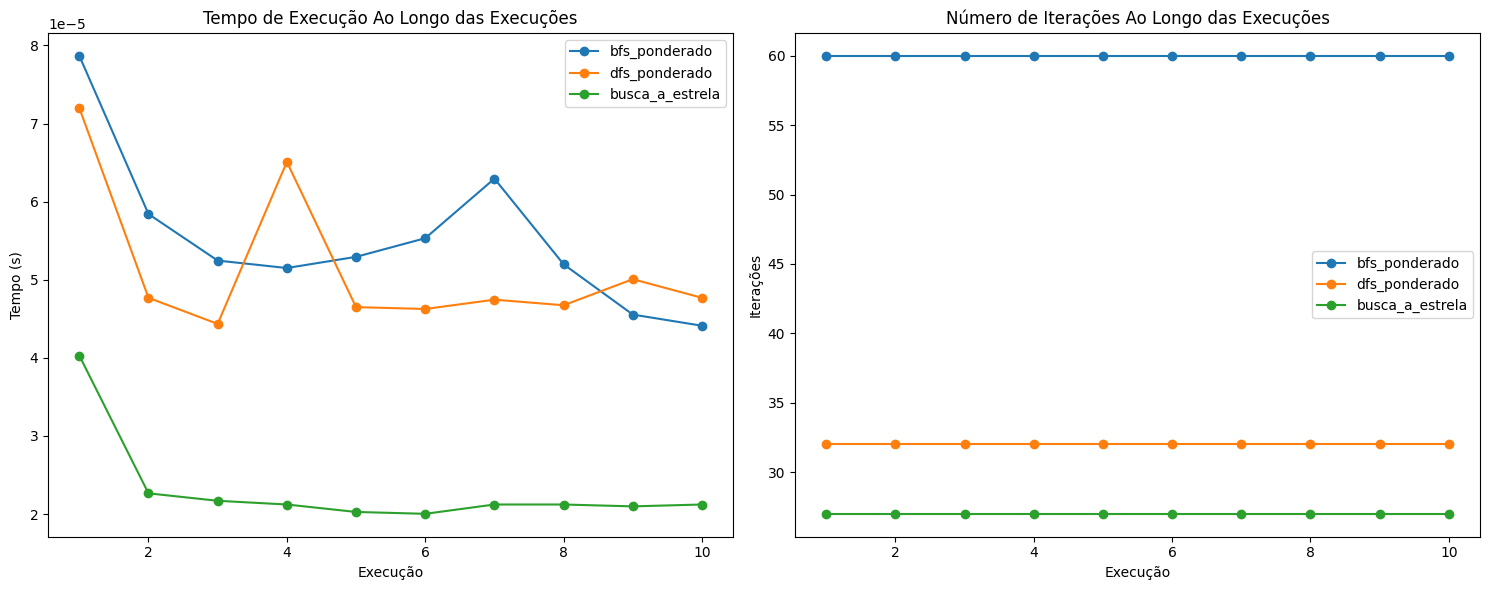

In [ ]:
# Plota os resultados
runs = list(range(1, NUM_RUNS + 1))

plt.figure(figsize=(15, 6))

# Gráfico para tempo de execução ao longo das execuções
plt.subplot(1, 2, 1)
for func, times in all_times.items():
    plt.plot(runs, times, marker='o', label=func)
plt.title('Tempo de Execução Ao Longo das Execuções')
plt.xlabel('Execução')
plt.ylabel('Tempo (s)')
plt.legend()

# Gráfico para iterações ao longo das execuções
plt.subplot(1, 2, 2)
for func, iterations in all_iterations.items():
    plt.plot(runs, iterations, marker='o', label=func)
plt.title('Número de Iterações Ao Longo das Execuções')
plt.xlabel('Execução')
plt.ylabel('Iterações')
plt.legend()

plt.tight_layout()
plt.show()


Por fim, plotamos as médias dos tempos de execução e número de iterações para cada um dos 3 algoritmos:

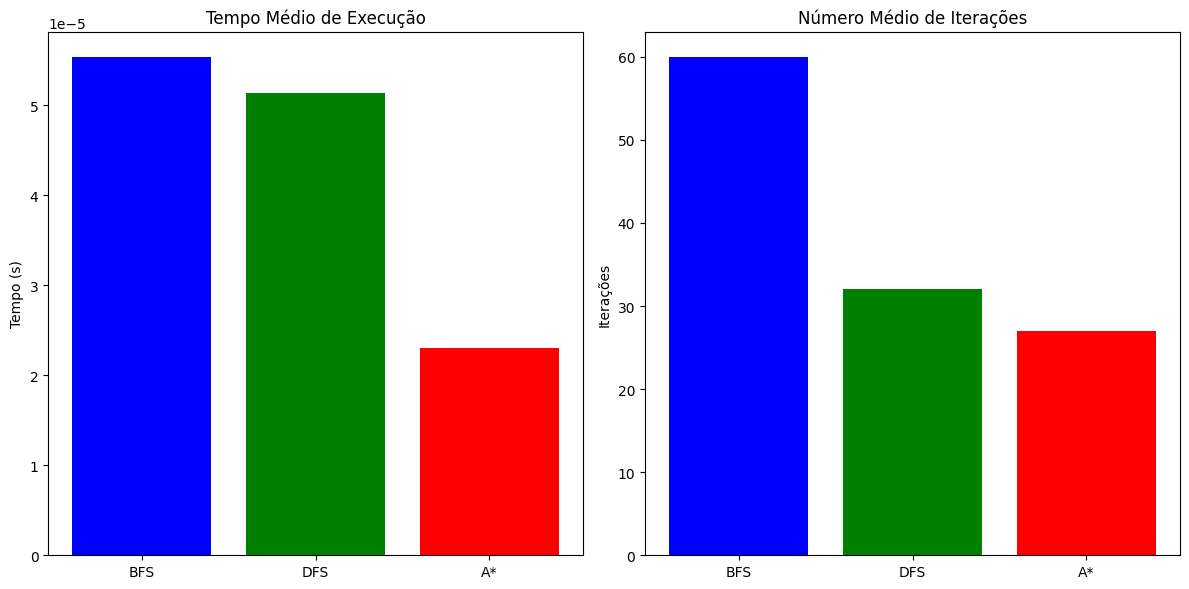

In [ ]:
# Plota os resultados
algorithms = ['BFS', 'DFS', 'A*']

plt.figure(figsize=(12, 6))

# Extraindo os valores dos dicionários para listas
avg_times_values = [avg_times[func] for func in ['bfs_ponderado', 'dfs_ponderado', 'busca_a_estrela']]
avg_iterations_values = [avg_iterations[func] for func in ['bfs_ponderado', 'dfs_ponderado', 'busca_a_estrela']]

# Gráfico para tempo médio
plt.subplot(1, 2, 1)
plt.bar(algorithms, avg_times_values, color=['blue', 'green', 'red'])
plt.title('Tempo Médio de Execução')
plt.ylabel('Tempo (s)')

# Gráfico para iterações médias
plt.subplot(1, 2, 2)
plt.bar(algorithms, avg_iterations_values, color=['blue', 'green', 'red'])
plt.title('Número Médio de Iterações')
plt.ylabel('Iterações')

plt.tight_layout()
plt.show()

Assim, observamos que a metodologia A* torna-se muito mais eficiente que as demais, por tratar-se de um algoritmo que retorna o caminho ótimo já desconsiderando outros caminhos redundantes que são percorridos pelos algoritmos BFS e DFS, possuindo grande vantagem devido a sua heurística. Além disso, observamos uma quantidade de iterações consideravelmente menor do algoritmo DFS em relação ao BFS, mesmo possuindo tempo de execução equivalente, por tratar-se de um algoritmo com poucas, mas longas buscas, em comparação às muitas, mas menores buscas do BFS.